In [1]:
from autograd import Variable, Module
import autograd
from optimizer import GD

import random
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
plt.rcParams["figure.figsize"] = (10,10)

# Simple Example: Minimizing Quadratic Function


In [2]:
# Defining the function to be optimized
def f(x):
    return (x-2)**2 + 4*x - 2
    

class QuadrFuncMod(Module):
    def __init__(self):
        super(QuadrFuncMod, self).__init__()
        self.x = Variable(-3)
        self.params.append(self.x)
    
    def forward(self):
        return f(self.x) 
    
    
def perform_gd(module, optim, epochs=100):
    func_value_history = []
    x_value_history = []
    for epoch in range(epochs):
        x_value_history.append(module.x.value)
        optim.zero_grad()
        func_value = module.forward()
        func_value.backward()
        optim.step()
        func_value_history.append(func_value.value)
        if epoch % 25 == 0:
            print(f"epoch: {epoch} | x: {module.x.value} | f(x): {func_value.value}")
    return x_value_history, func_value_history

In [3]:
# Perform optimization
module = QuadrFuncMod()
optim = GD(params=module.params, lr=0.05)
x_value_history, func_value_history = perform_gd(module, optim)

epoch: 0 | x: -2.7 | f(x): 11
epoch: 25 | x: -0.19383245667680027 | f(x): 2.046383976865882
epoch: 50 | x: -0.013915193059764297 | f(x): 2.000239052589988
epoch: 75 | x: -0.000998968909594789 | f(x): 2.000001232023312


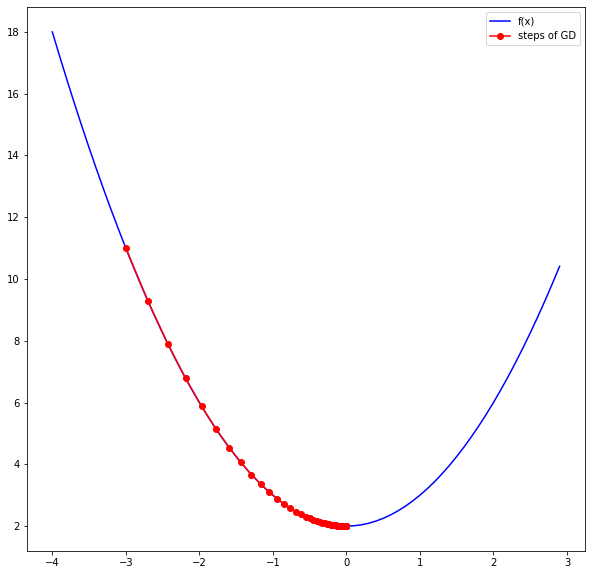

In [4]:
x_range = np.arange(-4, 3, .1)
plt.plot(x_range, f(x_range), label='f(x)', color='b')
plt.plot(x_value_history, func_value_history, '-o', color='r', label='steps of GD')
plt.legend()
plt.show()

# Multivariate Minimization

In [38]:
def z_func(x,y):
    return -(1-(x**2+y**3))*np.exp(-(x**2+y**2)/2)
    
exp = autograd.Exp()


class MulVariableMod(Module):
    def __init__(self):
        super(MulVariableMod, self).__init__()
        self.x = Variable(0.5)
        self.y = Variable(1.8)
        print(f"Starting initialization: x={self.x.value}, y={self.y.value}")
        self.params.append(self.x)
        self.params.append(self.y)
    
    def forward(self):
        return -(1-(self.x**2+self.y**3))*exp(-(self.x**2+self.y**2)/2)
    
def perform_2d_gd(module, optim, epochs=40):
    func_value_history = []
    x_value_history = []
    y_value_history = []
    
    for epoch in range(epochs):
        x_value_history.append(module.x.value)
        y_value_history.append(module.y.value) 

        optim.zero_grad()
        func_value = module.forward()
        func_value.backward()
        assert(math.isclose(func_value.value, z_func(module.x.value, module.y.value), abs_tol=1e-2))
        optim.step()
        
        func_value_history.append(func_value.value)
        if epoch % 2 == 0:
            print(f"epoch: {epoch} | x: {module.x.value} | y: {module.y.value} | f(x): {func_value.value}")            
    return np.array(x_value_history), np.array(y_value_history), np.array(func_value_history)

In [41]:
# Perform optimization
module = MulVariableMod()
optim = GD(params=module.params, lr=0.3)
x_value_history, y_value_history, func_value_history = perform_2d_gd(module, optim)

Starting initialization: x=0.5, y=1.8
epoch: 0 | x: 0.5807383783993567 | y: 1.7700099624946193 | f(x): 0.8875458339293328
epoch: 2 | x: 0.7636827819716762 | y: 1.677540559617428 | f(x): 0.8279350503650632
epoch: 4 | x: 0.9536686154243212 | y: 1.5270331402212134 | f(x): 0.7397063748723471
epoch: 6 | x: 1.1010639730193323 | y: 1.3087110915247961 | f(x): 0.6288576610701607
epoch: 8 | x: 1.1278480732956326 | y: 1.025218874828949 | f(x): 0.502965887714375
epoch: 10 | x: 0.902915571191885 | y: 0.6737565756232013 | f(x): 0.2981298791122319
epoch: 12 | x: 0.2858217436594449 | y: 0.27318515026650336 | f(x): -0.36291660996716524
epoch: 14 | x: 0.006293659002324717 | y: 0.08267698552058443 | f(x): -0.982282312207017
epoch: 16 | x: 6.580705948420736e-05 | y: 0.03389756132155515 | f(x): -0.9985172626204584
epoch: 18 | x: 6.631063268789872e-07 | y: 0.015428840916610877 | f(x): -0.9997306702142917
epoch: 20 | x: 6.6416106762552784e-09 | y: 0.007309896550514998 | f(x): -0.9999427777612135
epoch: 22 | 

Function and plot taking from here: [Link](https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html)

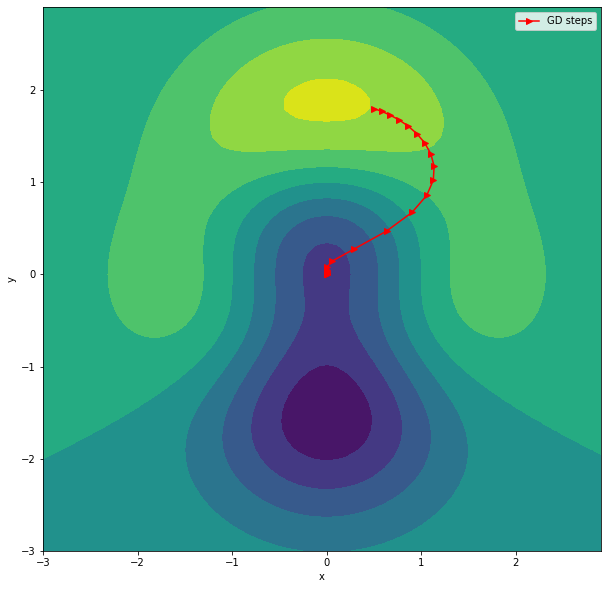

In [42]:
x = np.arange(-3.0,3.0,0.1)
y = np.arange(-3.0,3.0,0.1)
[X, Y] = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1)
Z = z_func(X,Y)
ax.contourf(X, Y, Z)  
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(x_value_history, y_value_history, '->', color='r', label='GD steps')
plt.legend()
plt.show()